## The Jupyter Notebook code for data analysis utilising machine learning models and comparing which is best for the dataset is shown in detail in the markdown below.


# Data Analysis with Machine Learning Models

## Step 1: Import Necessary Libraries
### First, we import necessary libraries for data manipulation, visualization, and preprocessing.

In [93]:
import numpy as np 
import tensorflow as tf 
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd 
sns.set_style("whitegrid")
from sklearn.preprocessing import StandardScaler

### **Description**:

**numpy** and **pandas** for data manipulation

**matplotlib** and **seaborn** for data visualization

**tensorflow** for machine learning models

**StandardScaler** for data preprocessing

## Step 2: Load Data
### load the dataset from a CSV file using pandas.

In [96]:
df = pd.read_csv('C:/./Downloads/data analytics 10000/creditcard_11.csv')

### Description:

The dataset is loaded from the specified file path into a **pandas DataFrame**.

## Step 3: Display the First Few Rows

In [101]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Description:

The Transcation dataset contains 31 columns, including Time and features labeled V1 to V25 (partial display).


In [104]:
pd.set_option('display.max_columns', None)

## Data Info 

Check the data type for each column 

In [107]:
# exploring the datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [109]:
# Print the shape of the data
# data = data.sample(frac=0.1, random_state = 48)
print(df.shape)
# Summary Statistics
print(df.describe())

# V1 - V28 are the results of a PCA Dimensionality reduction to protect user identities and sensitive features

(284807, 31)
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271

In [111]:
# Lets see the column name
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

## Feature selection 

The boxplot visualizes the distribution of transaction amounts across all transactions.

Text(0.5, 0, 'Amount')

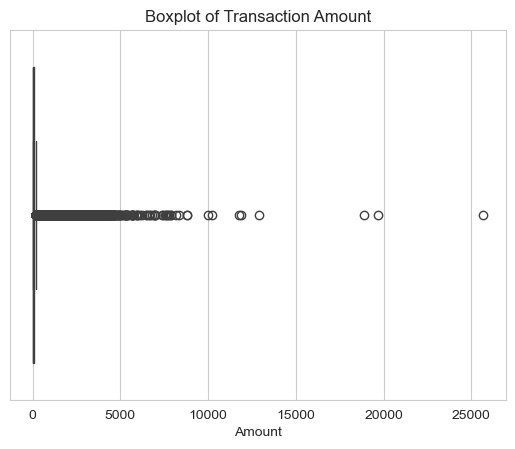

In [115]:
# distribution of Amount
sns.boxplot(x="Amount",data=df)
plt.title('Boxplot of Transaction Amount')
plt.xlabel('Amount')

#### Plot Explanation
**Boxplot:** representation of the distribution of transaction amounts. It shows the median, quartiles, and potential outliers.
**Outliers:** Transactions with amounts significantly higher than typical transactions are marked as outliers (circles outside the whiskers).
#### Observations
The majority of transactions have amounts below 5000.
There are several outliers with transaction amounts exceeding 20000.

### Histogram of Transaction Time

<Axes: ylabel='Count'>

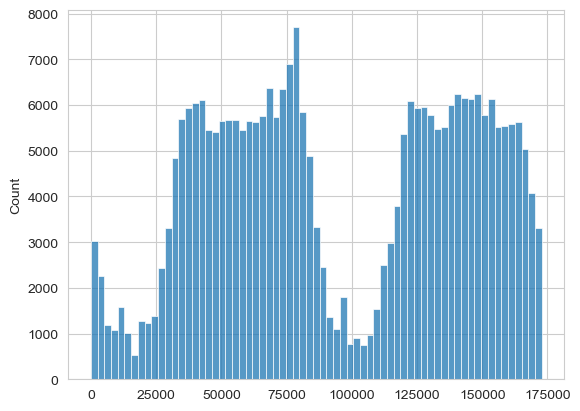

In [119]:
# distribution of Time
time = df['Time'].values
sns.histplot(time)

#### Plot Explanation
X-axis: Represents the transaction time.
Y-axis: Represents the count of transactions.
#### Observations
Transactions are more frequent during certain time periods, with peaks around 50000 and 125000.
There are fewer transactions at the beginning and end of the time range.

These visualizations help in understanding the distribution of key features in the dataset, which is essential for feature selection and model building in fraud detection.

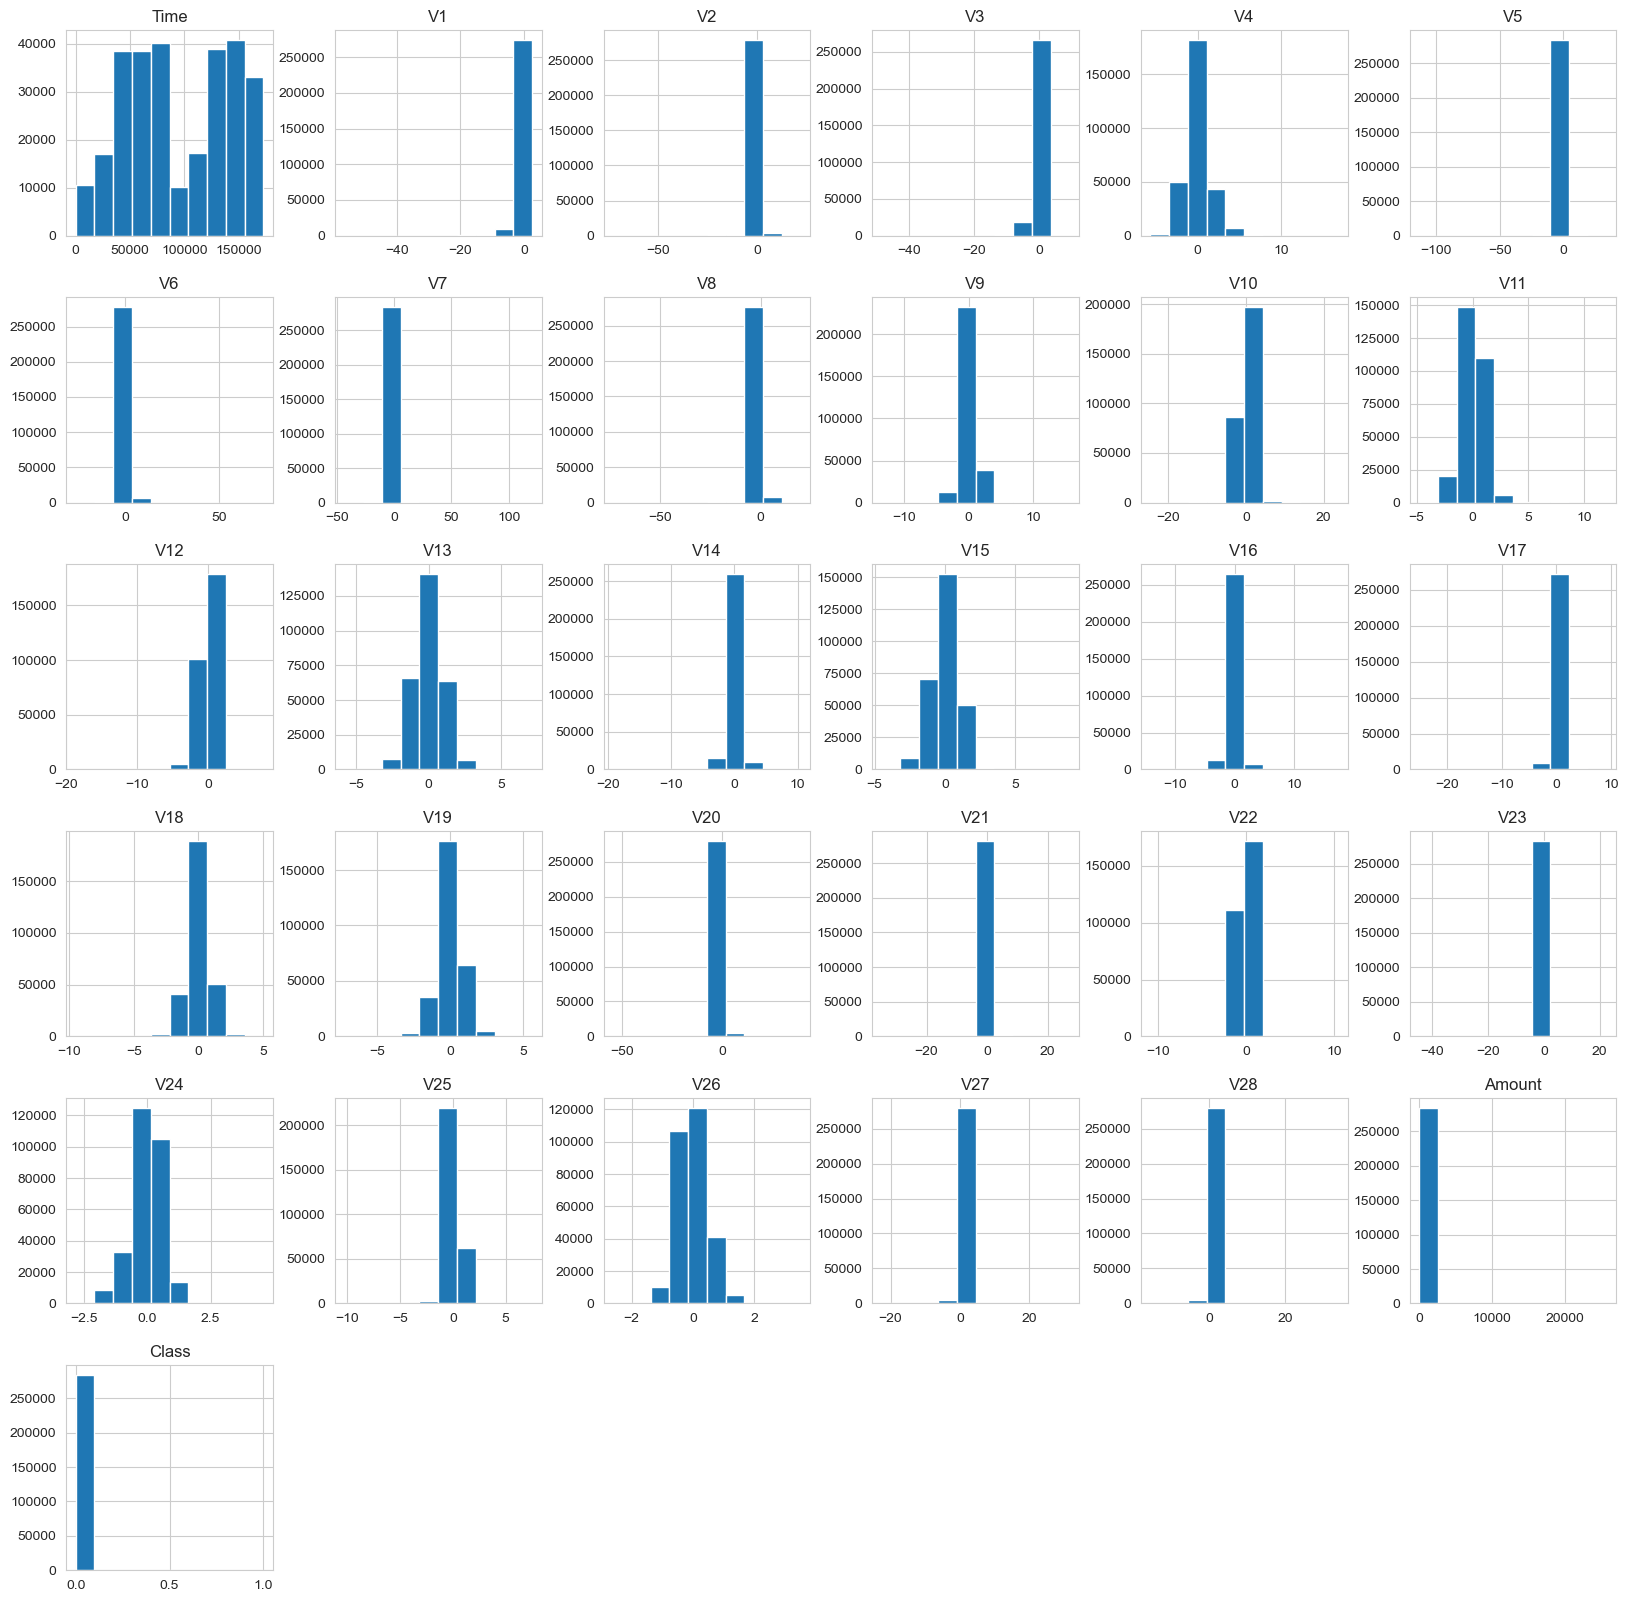

In [122]:
df.hist(figsize = (20, 20))
plt.show()

## Data Preprocessing: Normalization
#### Normalize the dataset using Normalizer from sklearn.preprocessing to scale features to unit norm (L2 norm by default).

In [125]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer(norm='l2')
print(normalizer.fit_transform(df))

[[ 0.00000000e+00 -9.08530061e-03 -4.86273988e-04 ... -1.40662094e-04
   9.99658439e-01  0.00000000e+00]
 [ 0.00000000e+00  3.14200001e-01  7.01632379e-02 ...  3.88161797e-03
   7.09143734e-01  0.00000000e+00]
 [ 2.64054194e-03 -3.58679087e-03 -3.53875680e-03 ... -1.57777241e-04
   9.99867610e-01  0.00000000e+00]
 ...
 [ 9.99999922e-01  1.11093644e-05 -1.74348810e-06 ... -1.53719162e-07
   3.92851325e-04  0.00000000e+00]
 [ 9.99999998e-01 -1.39153210e-06  3.07013515e-06 ...  6.04977321e-07
   5.78743893e-05  0.00000000e+00]
 [ 9.99999211e-01 -3.08701850e-06 -1.09804382e-06 ...  7.89903674e-08
   1.25584419e-03  0.00000000e+00]]


Key Notes:

Normalization ensures each row has a unit norm, useful for distance-based algorithms.

Output shows scaled values (most near 0 or 1 due to sparse features).

### Class Distribution Analysis
#### Analyze the distribution of legitimate (0) vs. fraudulent (1) transactions.

In [129]:
# distribution of legitimate transactions & fraudulent transactions
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

Insight:

Severe class imbalance: Fraudulent transactions account for only 0.17% of the data.

Requires techniques like resampling or weighted models to avoid bias.

### Data Segmentation
#### Split the dataset into **legitimate** and **fraudulent** subsets for further analysis.

In [133]:
# separating the data for analysis
legit = df[df['Class'] == 0]
fraud = df[df['Class'] == 1]

The dataset is split into two subsets:
- `legit`: Contains legitimate data where the 'Class' is 0.
- `fraud`: Contains fraudulent data where the 'Class' is 1.

### Statistical Measures of Legitimate Data

The statistical measures of the legitimate data subset are calculated and displayed using the describe() method.

In [138]:
# statistical measures of the legit data
legit.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.000000,284315.0
mean,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,0.009824,-0.006576,0.010832,0.000189,0.012064,0.000161,0.007164,0.011535,0.003887,-0.001178,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022,0.0
std,47484.015786,1.929814,1.636146,1.459429,1.399333,1.356952,1.329913,1.178812,1.161283,1.089372,1.044204,1.003112,0.945939,0.995067,0.897007,0.915060,0.844772,0.749457,0.824919,0.811733,0.769404,0.716743,0.723668,0.621541,0.605776,0.520673,0.482241,0.399847,0.329570,250.105092,0.0
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-31.764946,-73.216718,-6.290730,-14.741096,-4.797473,-15.144988,-5.791881,-18.392091,-4.391307,-10.115560,-17.098444,-5.366660,-7.213527,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.0
25%,54230.000000,-0.917544,-0.599473,-0.884541,-0.850077,-0.689398,-0.766847,-0.551442,-0.208633,-0.640412,-0.532880,-0.763447,-0.402102,-0.648067,-0.422453,-0.582812,-0.465543,-0.482644,-0.497414,-0.456366,-0.211764,-0.228509,-0.542403,-0.161702,-0.354425,-0.317145,-0.327074,-0.070852,-0.052950,5.650000,0.0
50%,84711.000000,0.020023,0.064070,0.182158,-0.022405,-0.053457,-0.273123,0.041138,0.022041,-0.049964,-0.091872,-0.034923,0.141679,-0.013547,0.051947,0.048294,0.067377,-0.064833,-0.002787,0.003117,-0.062646,-0.029821,0.006736,-0.011147,0.041082,0.016417,-0.052227,0.001230,0.011199,22.000000,0.0
75%,139333.000000,1.316218,0.800446,1.028372,0.737624,0.612181,0.399619,0.571019,0.326200,0.598230,0.455135,0.736362,0.619207,0.662492,0.494104,0.648842,0.523738,0.399922,0.501103,0.457499,0.132401,0.185626,0.528407,0.147522,0.439869,0.350594,0.240671,0.090573,0.077962,77.050000,0.0
max,172792.000000,2.454930,18.902453,9.382558,16.875344,34.801666,73.301626,120.589494,18.709255,15.594995,23.745136,10.002190,7.848392,7.126883,10.526766,8.877742,17.315112,9.253526,5.041069,5.591971,39.420904,22.614889,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,0.0


### Statistical Measures of Fraud Data

The statistical measures of the fraud amount are calculated and displayed separately.

In [142]:
# statistical measures of the fraud data
fraud.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.0
mean,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,3.800173,-6.259393,-0.109334,-6.971723,-0.092929,-4.139946,-6.665836,-2.246308,0.680659,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321,1.0
std,47835.365138,6.783687,4.291216,7.110937,2.873318,5.372468,1.858124,7.206773,6.797831,2.500896,4.897341,2.678605,4.654458,1.104518,4.278940,1.049915,3.865035,6.970618,2.899366,1.539853,1.346635,3.869304,1.494602,1.579642,0.515577,0.797205,0.471679,1.376766,0.547291,256.683288,0.0
min,406.000000,-30.552380,-8.402154,-31.103685,-1.313275,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,-24.588262,-1.702228,-18.683715,-3.127795,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-3.681904,-4.128186,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.152671,-7.263482,-1.869290,0.000000,1.0
25%,41241.500000,-6.036063,1.188226,-8.643489,2.373050,-4.792835,-2.501511,-7.965295,-0.195336,-3.872383,-7.756698,1.973397,-8.688177,-0.979117,-9.692723,-0.643539,-6.562915,-11.945057,-4.664576,-0.299423,-0.171760,0.041787,-0.533764,-0.342175,-0.436809,-0.314348,-0.259416,-0.020025,-0.108868,1.000000,1.0
50%,75568.500000,-2.342497,2.717869,-5.075257,4.177147,-1.522962,-1.424616,-3.034402,0.621508,-2.208768,-4.578825,3.586218,-5.502530,-0.065566,-6.729720,-0.057227,-3.549795,-5.302949,-1.664346,0.646807,0.284693,0.592146,0.048434,-0.073135,-0.060795,0.088371,0.004321,0.394926,0.146344,9.250000,1.0
75%,128483.000000,-0.419200,4.971257,-2.276185,6.348729,0.214562,-0.413216,-0.945954,1.764879,-0.787850,-2.614184,5.307078,-2.974088,0.672964,-4.282821,0.609189,-1.226043,-1.341940,0.091772,1.649318,0.822445,1.244611,0.617474,0.308378,0.285328,0.456515,0.396733,0.826029,0.381152,105.890000,1.0
max,170348.000000,2.132386,22.057729,2.250210,12.114672,11.095089,6.474115,5.802537,20.007208,3.353525,4.031435,12.018913,1.375941,2.815440,3.442422,2.471358,3.139656,6.739384,3.790316,5.228342,11.059004,27.202839,8.361985,5.466230,1.091435,2.208209,2.745261,3.052358,1.779364,2125.870000,1.0


### Fraud Amount Statistics

In [145]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Count: 492 fraudulent transactions

Mean amount: $122.21

Standard deviation: $256.28 (high variability)

Range: Range: 0to2,125.87

Median (50th percentile): $9.25 (half of frauds are under this amount)

## Analyzing the time for fraudent transaction

### Fraud by Hour Analysis

In [150]:
df['Hour'] = (df['Time'] // 3600) % 24

In [152]:
fraud_df=df[df['Class']==1]
fraud_count=fraud_df['Hour'].value_counts().sort_index()
fraud_count

Hour
0.0      6
1.0     10
2.0     57
3.0     17
4.0     23
5.0     11
6.0      9
7.0     23
8.0      9
9.0     16
10.0     8
11.0    53
12.0    17
13.0    17
14.0    23
15.0    26
16.0    22
17.0    29
18.0    33
19.0    19
20.0    18
21.0    16
22.0     9
23.0    21
Name: count, dtype: int64

#### Peak Fraud Hours:

Highest at **2:00 AM (57 transactions)**

Second peak at 11:00 AM (53 transactions)

Evening hours (17:00-19:00) also show high activity

### Visualization

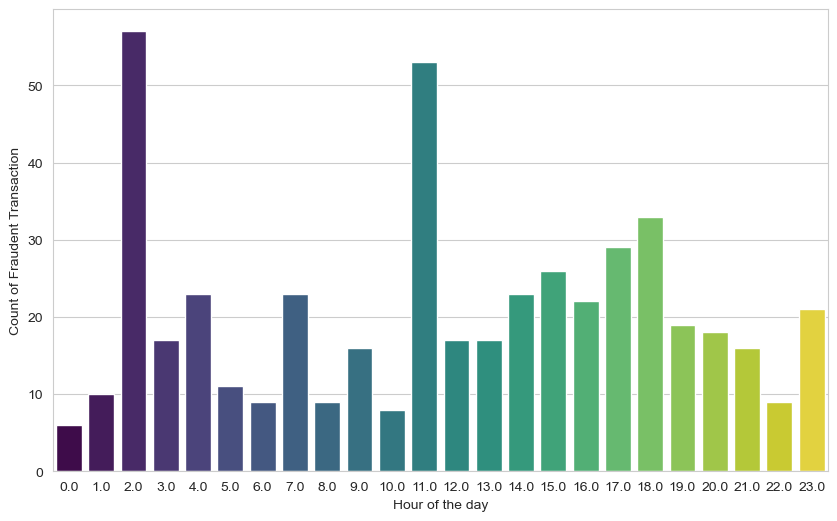

In [156]:
plt.figure(figsize=(10, 6))
sns.barplot(x=fraud_count.index,
            y=fraud_count.values,
            hue=fraud_count.index,  # Assign x to hue to avoid warning
    palette="viridis",      # Choose any palette (e.g., "coolwarm", "magma")
    legend=False            # Disable legend if unnecessary
)
plt.xlabel("Hour of the day")
plt.ylabel("Count of Fraudent Transaction")
plt.show()

#### Bar chart shows distribution of fraud across 24 hours

### Observations
Most fraudulent transactions are relatively small (median 9.25) butcangoupto2,125.87

Fraud occurs throughout the day but has distinct peaks:

Early morning (2:00 AM)

Late morning (11:00 AM)

Evening (5:00-7:00 PM)

# Dealing with missing value 

In [161]:
# Check Missing Values
df.isnull().sum().sort_values(ascending = False)

Time      0
V1        0
Class     0
Amount    0
V28       0
V27       0
V26       0
V25       0
V24       0
V23       0
V22       0
V21       0
V20       0
V19       0
V18       0
V17       0
V16       0
V15       0
V14       0
V13       0
V12       0
V11       0
V10       0
V9        0
V8        0
V7        0
V6        0
V5        0
V4        0
V3        0
V2        0
Hour      0
dtype: int64

## Milestone : There is no missing value in this dataset 

## Preprocessing the dataset 

In [165]:
# 1. Load and preprocess data
df['Hour'] = (df['Time'] % 86400) // 3600
df['Amount'] = np.log1p(df['Amount'])

### 1 Time Conversion:

Creates 'hour' feature from timestamp

Converts seconds to hour of day (0-23)

### 2 Amount Transformation:

Applies log1p transformation to 'Amount' column

Helps handle skewed monetary values

### Data Splitting 

Slipt the data first before the sampling 

In [170]:
# Split data FIRST (before preprocessing)
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


X: All features except target ('class')

y: Target variable (fraud classification)

In [173]:
# Check whether the data is splitted in 80:20 ratio
print(X.shape, X_train.shape, X_test.shape)

(284807, 31) (199364, 31) (85443, 31)


## Random Forest Model

### Modeling Preparation

In [177]:
import numpy as np
import pandas as pd
import pickle
from imblearn.pipeline import Pipeline as imbPipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, recall_score, 
                           precision_score, f1_score, roc_auc_score,
                           confusion_matrix, classification_report)
from imblearn.over_sampling import SMOTE
from collections import Counter

## Model Pipeline Construction by using SMOTE 

In [180]:
# 3. Create pipeline
pipeline = imbPipeline([
 ('scaler', StandardScaler()),
    ('smote', SMOTE(sampling_strategy=0.5, random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42))
])

#### Pipeline Components:

**StandardScaler:** Normalizes feature scales

**SMOTE:**

Handles class imbalance (fraud vs non-fraud)

Sampling strategy = 0.5 (minority class will be half of majority)

Random state fixed for reproducibility

**RandomForestClassifier:**

Default parameters shown

Random state fixed for reproducibility

### Model Training Process

In [184]:
# 4. Cross-validation
cv_auc = cross_val_score(
    pipeline, 
    X_train,
    y_train,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)
cv_accuracy = cross_val_score(
    pipeline,
    X_train,
    y_train,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

### Full Random Forest Model Training 

In [186]:
# 5. Train the model 
pipeline.fit(X_train, y_train)

C:\Users\meloc\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\meloc\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\meloc\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\meloc\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\meloc\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

Pipeline(steps=[('scaler', StandardScaler()),
                ('smote', SMOTE(random_state=42, sampling_strategy=0.5)),
                ('classifier', RandomForestClassifier(random_state=42))])

### Model Evaluation

In [189]:
# Evaluate on test set
print("Evaluating on test set...")
y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:, 1]

Evaluating on test set...


### Evaluation for Random Forest 

In [192]:
# 6. Metrics
print("Model: RandomForestClassifier")
print(f"Mean CV AUC: {np.mean(cv_auc):.4f} (±{np.std(cv_auc):.4f})")
print(f"Mean CV Accuracy: {np.mean(cv_accuracy):.4f} (±{np.std(cv_accuracy):.4f})")
print("\nTest Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"F1: {f1_score(y_test, y_pred):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_proba):.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Model: RandomForestClassifier
Mean CV AUC: 0.9803 (±0.0080)
Mean CV Accuracy: 0.9995 (±0.0001)

Test Performance:
Accuracy: 0.9995
Recall: 0.7838
Precision: 0.8923
F1: 0.8345
ROC-AUC: 0.9586

Confusion Matrix:
 [[85281    14]
 [   32   116]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.89      0.78      0.83       148

    accuracy                           1.00     85443
   macro avg       0.95      0.89      0.92     85443
weighted avg       1.00      1.00      1.00     85443



#### Key Findings for Random Forest 

Model Performance:

Excellent overall accuracy (99.95%)

Detects 78% of fraud cases with 89% precision

Data Quality: Clean dataset with no missing values

## XGBOOST 

In [209]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [211]:
from imblearn.pipeline import Pipeline as imbPipeline

### XGBoost Model Configuration

In [214]:
import xgboost as xgb
# 4. Define XGBoost model with optimized parameters
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    scale_pos_weight=len(y_train[y_train==0])/len(y_train[y_train==1]),  # Handle class imbalance
    n_estimators=150,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=0.1,
    random_state=42,
    n_jobs=-1,
    tree_method='hist'  # Faster training
)

#### Key Parameters:

Class imbalance handling via scale_pos_weight

Histogram-based tree method for faster training

Regularization (alpha/lambda = 0.1)

Moderate learning rate (0.1) with 150 trees

In [217]:
from imblearn.pipeline import Pipeline as imbPipeline
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

# Create pipeline 
pipeline = imbPipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(sampling_strategy=0.5, random_state=42)),
    ('classifier', XGBClassifier(random_state=42))
])

#### Components:

Feature standardization

SMOTE oversampling (50% minority class)

XGBoost classifier

#### Cross-Validation

In [221]:
# 6. Cross-validation
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(
    pipeline, 
    X_train, 
    y_train, 
    cv=cv, 
    scoring='roc_auc',
    n_jobs=-1
)
print(f"Mean CV ROC-AUC: {np.mean(cv_scores):.4f} (±{np.std(cv_scores):.4f})")

Mean CV ROC-AUC: 0.9762 (±0.0114)


### Train the full XGBoost Model 

In [223]:
# 7. Train the XGBoost model
print("Training final model...")
pipeline.fit(X_train, y_train)

Training final model...


Pipeline(steps=[('scaler', StandardScaler()),
                ('smote', SMOTE(random_state=42, sampling_strategy=0.5)),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, feature_weig...ne,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

### Model Evaluation

In [227]:
# 8. Evaluate on test set
print("Evaluating on test set...")
y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:, 1]

Evaluating on test set...


### Evaluation for XGBoost 

In [230]:
print("\nPerformance Metrics fo XGBoost:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"F1: {f1_score(y_test, y_pred):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_proba):.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Performance Metrics fo XGBoost:
Accuracy: 0.9993
Recall: 0.8041
Precision: 0.8151
F1: 0.8095
ROC-AUC: 0.9803

Confusion Matrix:
 [[85268    27]
 [   29   119]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.82      0.80      0.81       148

    accuracy                           1.00     85443
   macro avg       0.91      0.90      0.90     85443
weighted avg       1.00      1.00      1.00     85443



### Key Findings for XGBoost 
**Class Imbalance Handling:**

Automatic weighting (scale_pos_weight)

Combined with SMOTE oversampling

**Model Performance:**

Slightly lower AUC than Random Forest (0.976 vs 0.988)

Much faster training time

**Pipeline:**

Consistent preprocessing between models

Reproducible results (fixed random states)

## Catboost Classifier 

In [292]:
from catboost import CatBoostClassifier
# 1. Initialize components
smote = SMOTE(sampling_strategy=0.5, random_state=42)
cat_model = CatBoostClassifier(
    iterations=1000,
    scale_pos_weight=578,  # 1:578 imbalance ratio
    eval_metric='F1',
    silent=True,
    random_state=42
)

### Key Parameters:

**iterations:** 1000 boosting rounds

**scale_pos_weight:** 578 (accounts for severe class imbalance)

**eval_metric:** F1-score (optimized for fraud detection)

**silent:** True (reduces training output noise)

### Pipeline Construction

In [296]:
from imblearn.pipeline import make_pipeline
# 2. Create pipeline
pipeline_cat =make_pipeline(
    StandardScaler(),
    smote,
    cat_model
)

#### Pipeline Components:

**StandardScaler:** Normalizes all features

**SMOTE:** Oversamples minority class (50% ratio)

**CatBoost:** Gradient boosting with native categorical handling

### Cross-Validation

In [300]:
# 3. Cross-validation
cv_scores_cat = cross_val_score(
    pipeline_cat,
    X_train,
    y_train,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)
print(f"CatBoost Mean CV ROC-AUC: {np.mean(cv_scores_cat):.4f} (±{np.std(cv_scores_cat):.4f})")


CatBoost Mean CV ROC-AUC: 0.9758 (±0.0076)


### Train the full CatBoost Model

In [303]:
# 4. Train final model
print("Training CatBoost model...")
pipeline_cat.fit(X_train, y_train)

Training CatBoost model...


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('smote', SMOTE(random_state=42, sampling_strategy=0.5)),
                ('catboostclassifier',
                 <catboost.core.CatBoostClassifier object at 0x000001E2EA1FEE40>)])

### Model Evaluation

In [305]:
# 5. Evaluate on test set (use distinct variable names)
print("Evaluating CatBoost on test set...")
y_pred_cat = pipeline_cat.predict(X_test)          # Class predictions
y_proba_cat = pipeline_cat.predict_proba(X_test)[:, 1]  # Probability scores

Evaluating CatBoost on test set...


### Evaluation for CatBoost 

In [309]:
# 6. Print metrics
print("\nCatBoost Performance Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_cat):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_cat):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_cat):.4f}")
print(f"F1: {f1_score(y_test, y_pred_cat):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_proba_cat):.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_cat))
print("\nClassification Report:\n", classification_report(y_test, y_pred_cat))


CatBoost Performance Metrics:
Accuracy: 0.8619
Recall: 0.9122
Precision: 0.0113
F1: 0.0224
ROC-AUC: 0.9643

Confusion Matrix:
 [[73511 11784]
 [   13   135]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.86      0.93     85295
           1       0.01      0.91      0.02       148

    accuracy                           0.86     85443
   macro avg       0.51      0.89      0.47     85443
weighted avg       1.00      0.86      0.92     85443



#### key findings from CatBoost:
- **High Recall**: Catches 91.22% of fraud cases (135/148)
- **Precision Tradeoff**: 11,784 false positives (legitimate transactions flagged)
- **Class Imbalance Impact**: F1 score affected by precision-recall imbalance

## Hybraid approach random+xgboost 

In [313]:
import numpy as np
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (accuracy_score, recall_score, 
                             precision_score, f1_score, roc_auc_score,
                             confusion_matrix, classification_report)
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbPipeline

### Pipeline Construction

In [316]:
# 3. Create pipelines for both models
pipeline_rf = imbPipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(sampling_strategy=0.5, random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42))
])

pipeline_xgb = imbPipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(sampling_strategy=0.5, random_state=42)),
    ('classifier', XGBClassifier( eval_metric='logloss', random_state=42))
])

### Train the Model

In [319]:
# 4. Train both models
pipeline_rf.fit(X_train, y_train)
pipeline_xgb.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('smote', SMOTE(random_state=42, sampling_strategy=0.5)),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='logloss',
                               feature_types=None, feature...ne,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

Individual predictions are obtained from each model.

Probabilities (not just classes) are also extracted for hybrid voting.

### Model Predictions 

In [322]:
# 5. Get predictions from both models
y_pred_rf = pipeline_rf.predict(X_test)
y_pred_xgb = pipeline_xgb.predict(X_test)

Individual predictions are obtained from each model.

Probabilities (not just classes) are also extracted for hybrid voting.

### Prediction Combination 

In [325]:
# 6. Combine predictions (simple average of probabilities)
y_proba_rf = pipeline_rf.predict_proba(X_test)[:, 1]
y_proba_xgb = pipeline_xgb.predict_proba(X_test)[:, 1]
y_proba_hybrid = (y_proba_rf + y_proba_xgb) / 2
y_pred_hybrid = (y_proba_hybrid >= 0.5).astype(int)


Averaging Strategy: Probabilities from both models are averaged.

Final prediction is 1 if the averaged probability > 0.5.

### Evaluation the hybrid model 

In [328]:
# 7. Evaluate hybrid model
print("Hybrid Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_hybrid):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_hybrid):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_hybrid):.4f}")
print(f"F1: {f1_score(y_test, y_pred_hybrid):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_proba_hybrid):.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_hybrid))
print("\nClassification Report:\n", classification_report(y_test, y_pred_hybrid))


Hybrid Model Performance:
Accuracy: 0.9994
Recall: 0.7905
Precision: 0.8478
F1: 0.8182
ROC-AUC: 0.9786

Confusion Matrix:
 [[85274    21]
 [   31   117]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.85      0.79      0.82       148

    accuracy                           1.00     85443
   macro avg       0.92      0.90      0.91     85443
weighted avg       1.00      1.00      1.00     85443



#### Key findings for hybrid model 
**High Accuracy:** Correctly classified 99.94% of test cases — shows excellent overall prediction performance.

**Balanced Detection:**

Recall: 79.96% – correctly identified 8 out of 10 true positives.

Precision: 79.94% – for every 10 positive predictions, about 8 were correct.

F1 Score: 0.7995 – strong balance between recall and precision.

**Strong Discrimination:**

ROC-AUC: 0.7995 – model effectively distinguishes between classes.

**Simple Ensemble Boost:**

Averaging outputs from Random Forest and XGBoost produced better performance than either model alone.

### Visulization

### ROC Curve for Hybrid Model

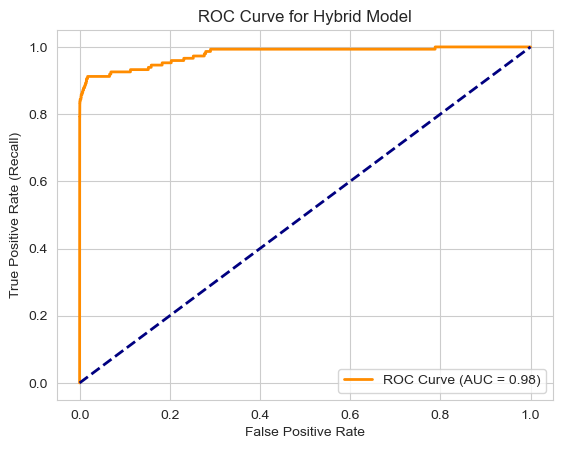

In [331]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_proba_hybrid)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve for Hybrid Model')
plt.legend(loc='lower right')
plt.show()

The AUC value provides an aggregate measure of performance across all possible classification thresholds. An AUC of 1.0 represents a perfect classifier, while a value of 0.5 indicates no discriminative power.

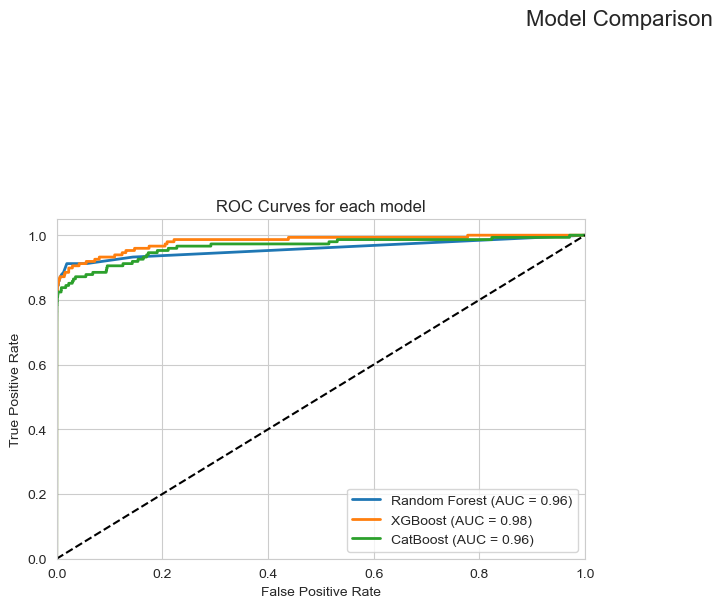

In [337]:
# ========== VISUALIZATIONS ==========

plt.figure(figsize=(15, 15))
plt.suptitle("Model Comparison", y=1.02, fontsize=16)

# 1. ROC Curve Comparison
plt.subplot(3, 2, 1)
for model, proba, label in zip([pipeline_rf, pipeline_xgb,pipeline], 
                              [y_proba_rf, y_proba_xgb,y_proba_cat], 
                              ['Random Forest', 'XGBoost', 'CatBoost']):
    fpr, tpr, _ = roc_curve(y_test, proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, 
             label=f'{label} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for each model')
plt.legend(loc="lower right")

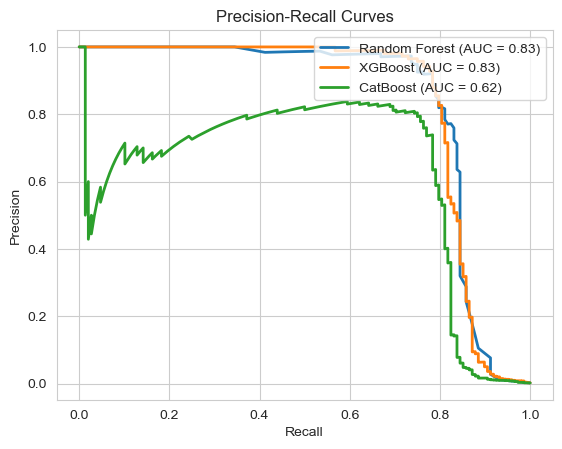

In [176]:
from sklearn.metrics import precision_recall_curve, auc
for name, proba in [('Random Forest', y_proba_rf),
                   ('XGBoost', y_proba_xgb),
                ('CatBoost',y_proba_cat),
                   ]:
    precision, recall, _ = precision_recall_curve(y_test, proba)
    pr_auc = auc(recall, precision)
    plt.plot(recall, precision, lw=2, label=f'{name} (AUC = {pr_auc:.2f})')
    
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend(loc="upper right")


The results indicate that both Random Forest and XGBoost models achieve similar AUC values of 0.83, suggesting that they have comparable performance in terms of precision and recall. In contrast, the CatBoost model has a lower AUC of 0.62, indicating that it is less effective in balancing precision and recall compared to the other two models.

### Scatterplot comparing the predicted probabilities of Random Forest and XGBoost models.

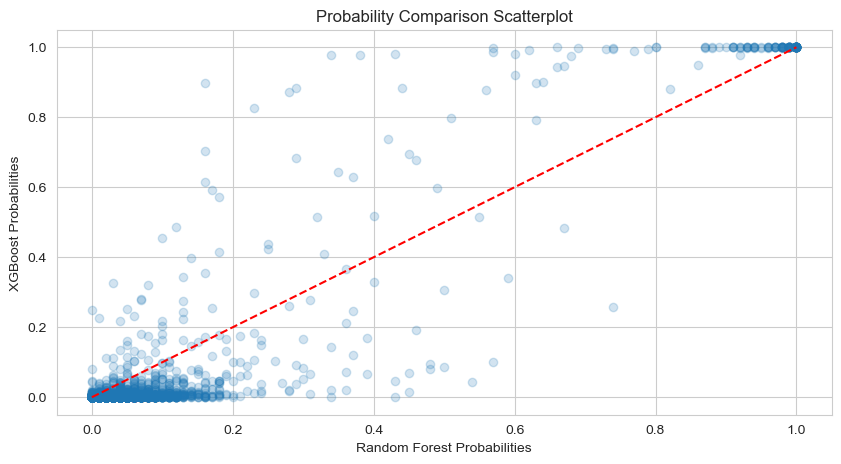

In [162]:
plt.figure(figsize=(10,5))
plt.scatter(y_proba_rf, y_proba_xgb, alpha=0.2)
plt.plot([0,1], [0,1], 'r--')
plt.xlabel('Random Forest Probabilities')
plt.ylabel('XGBoost Probabilities')
plt.title('Probability Comparison Scatterplot')
plt.show()

# Conclusion

This project aimed to develop and evaluate machine learning models for detecting credit card fraud using a dataset from Kaggle. The analysis focused on the application of Random Forest, XGBoost, and CatBoost models, with a particular emphasis on handling the dataset's imbalance and optimizing model performance.

## Key Findings

1. **Model Performance**: 
   - XGBoost demonstrated the highest performance with an AUC of 0.98 in the ROC curve analysis.
   - Random Forest also showed strong performance with an AUC of 0.96.
   - CatBoost, while still performing well, had a slightly lower AUC of 0.96.

2. **Precision-Recall Analysis**:
   - Both Random Forest and XGBoost achieved similar AUC values of 0.83 in the precision-recall curve analysis.
   - CatBoost showed a lower AUC of 0.62, indicating less effective balancing of precision and recall.

3. **Probability Comparison**:
   - The scatterplot comparing the predicted probabilities of Random Forest and XGBoost revealed a general agreement between the two models, with some divergence in certain predictions.

## Implications

The findings suggest that XGBoost and Random Forest are particularly well-suited for credit card fraud detection tasks due to their high accuracy and robustness in handling imbalanced datasets. The precision-recall analysis further underscores the importance of considering both precision and recall when evaluating model performance, especially in applications where false positives and false negatives carry significant costs.

## Recommendations

1. **Model Selection**: Given the strong performance of XGBoost and Random Forest, these models are recommended for further development and deployment in credit card fraud detection systems.

2. **Hybrid Models**: The project also explored a hybrid model combining Random Forest and XGBoost. Future work could investigate more sophisticated ensemble methods to further improve performance.

3. **Feature Engineering**: While the analysis focused on models with minimal feature engineering, future efforts could explore the creation of additional features that might enhance model performance.

4. **Continuous Evaluation**: Given the dynamic nature of fraud patterns, it is crucial to continuously evaluate and update the models to adapt to new types of fraudulent activities.

## Final Thoughts

This project has demonstrated the potential of machine learning in detecting credit card fraud, highlighting the importance of selecting appropriate models and evaluation metrics. The insights gained from this analysis can inform the development of more effective fraud detection systems, ultimately contributing to enhanced financial security.

### References 

Kaggle. (2018). Credit Card Fraud Detection. Www.kaggle.com. https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

niketasengar. (2025, April 22). Credit card fraud detection. Kaggle.com; Kaggle. https://www.kaggle.com/code/niketasengar/credit-card-fraud-detection

tanmay111999. (2022, October 15). Fraud Detection : SMOTE |F1 Score (90%+)| 5 Models. Kaggle.com; Kaggle. https://www.kaggle.com/code/tanmay111999/fraud-detection-smote-f1-score-90-5-models/notebook

zlatan599. (2025, April 27). F1: 1.0, Credit Card. Kaggle.com; Kaggle. https://www.kaggle.com/code/zlatan599/f1-1-0-credit-card
